# Aprendizaje supervisado - entrenamiento de modelos de machine learning regresion

## Importacion de librerias 

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

## Lectura de datos

In [122]:
df = pd.read_csv('housing.csv')

In [123]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Eda : Analisis exploratorio

### Analisis univariados

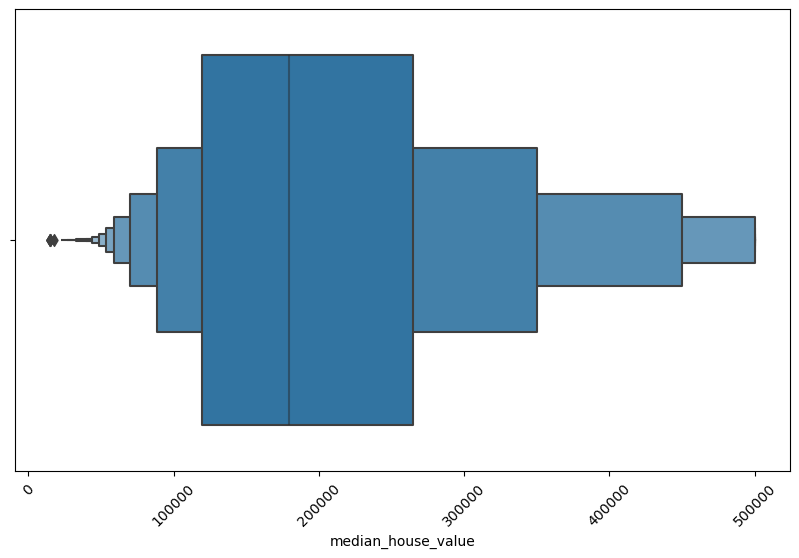

In [126]:
fig = plt.figure(figsize=(10,6))

sns.boxenplot(data=df, x='median_house_value')  
plt.title("")
plt.xticks(rotation=45)
plt.show()

In [127]:
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

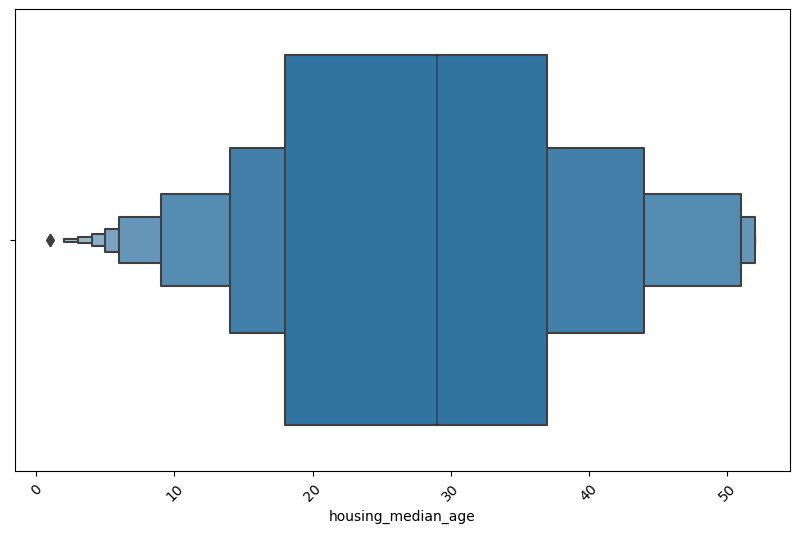

In [128]:
fig = plt.figure(figsize=(10,6))

sns.boxenplot(data=df, x='housing_median_age')  
plt.title("")
plt.xticks(rotation=45)
plt.show()

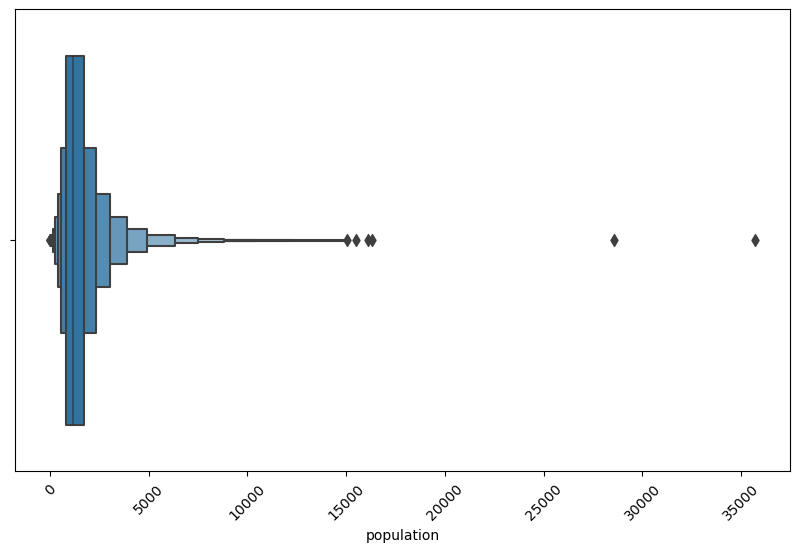

In [129]:
fig = plt.figure(figsize=(10,6))

sns.boxenplot(data=df, x='population')  
plt.title("")
plt.xticks(rotation=45)
plt.show()

In [130]:
df.population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [131]:
df.population.quantile(0.99)

5805.830000000002

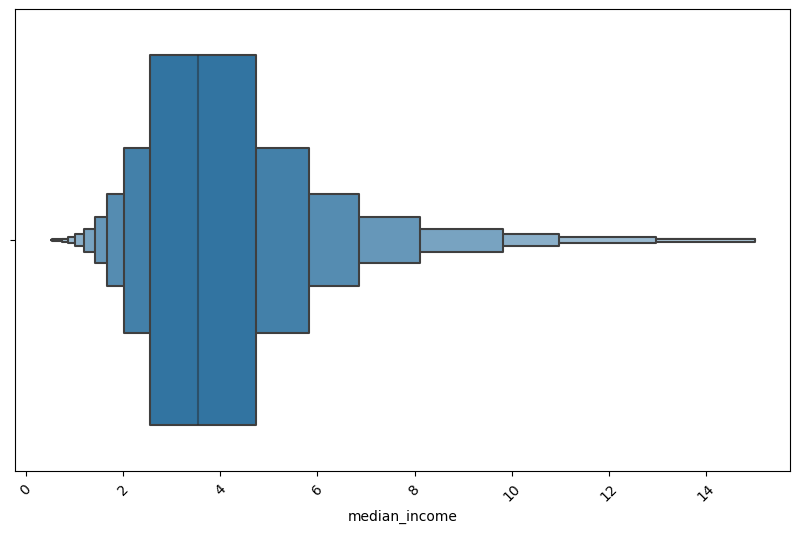

In [132]:
fig = plt.figure(figsize=(10,6))

sns.boxenplot(data=df, x='median_income')  
plt.title("")
plt.xticks(rotation=45)
plt.show()

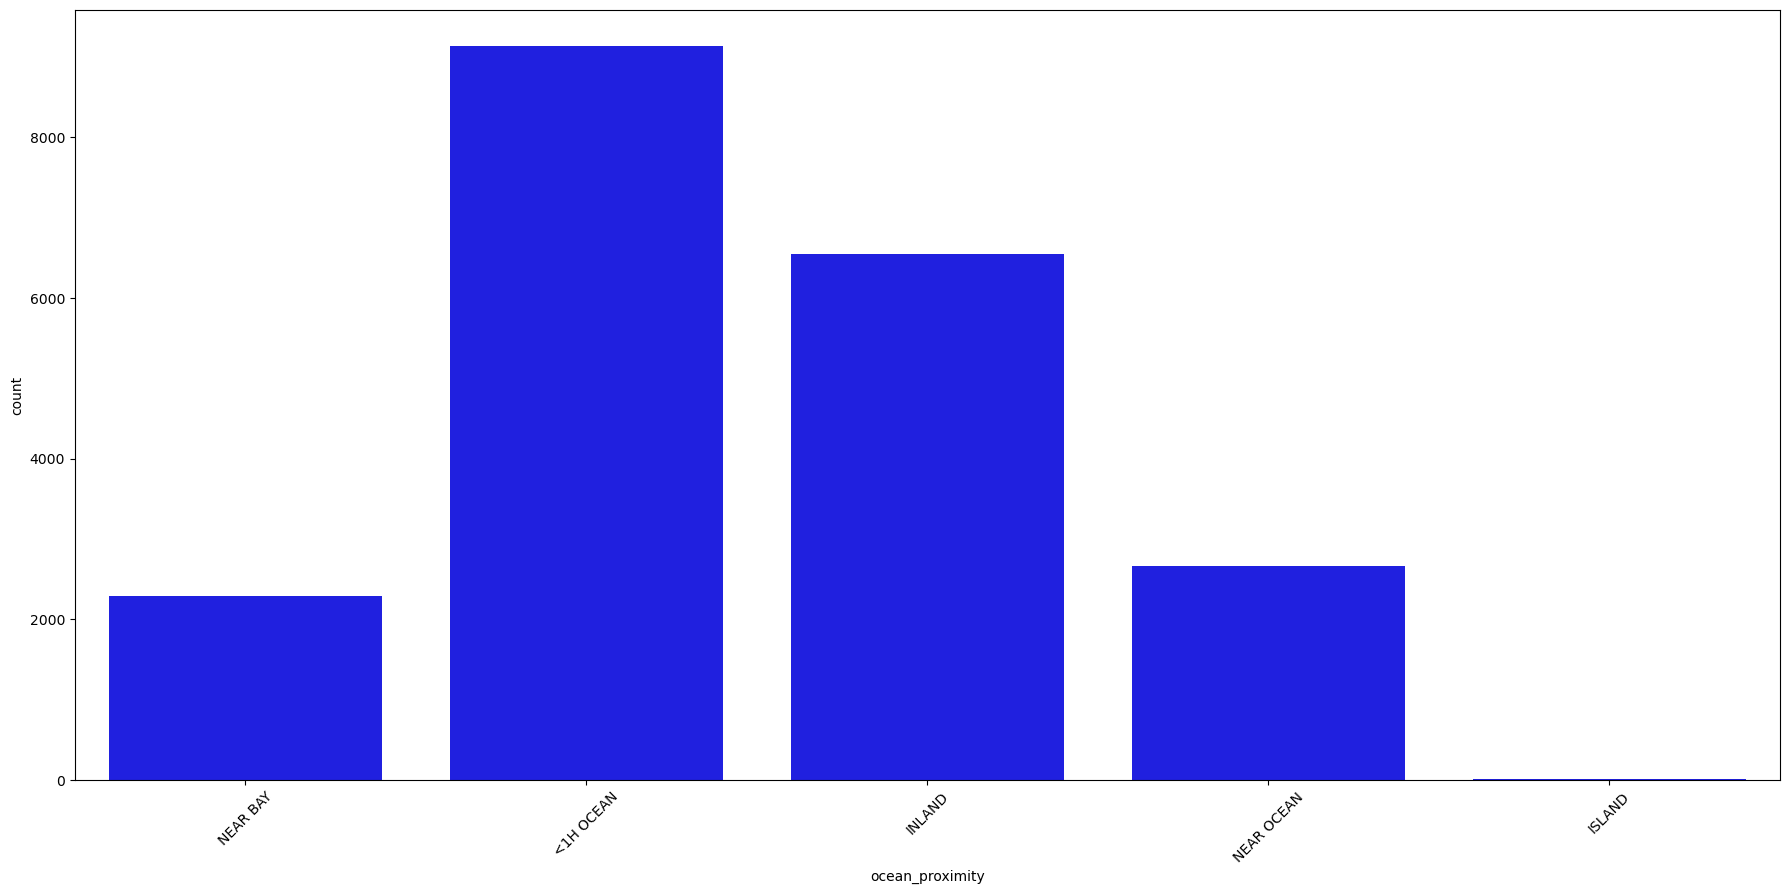

In [133]:
fig = plt.figure(figsize=(22,10))
sns.countplot(data=df, x='ocean_proximity',
                color='blue')
plt.xticks(rotation=45)
plt.title("")
plt.ticklabel_format(style='plain', axis='y')

### Analisis bivariados

Asumimos que el dataset contiene datos del valor medio del precio de una casa por manzana/cuadra, en una zona centrica. 

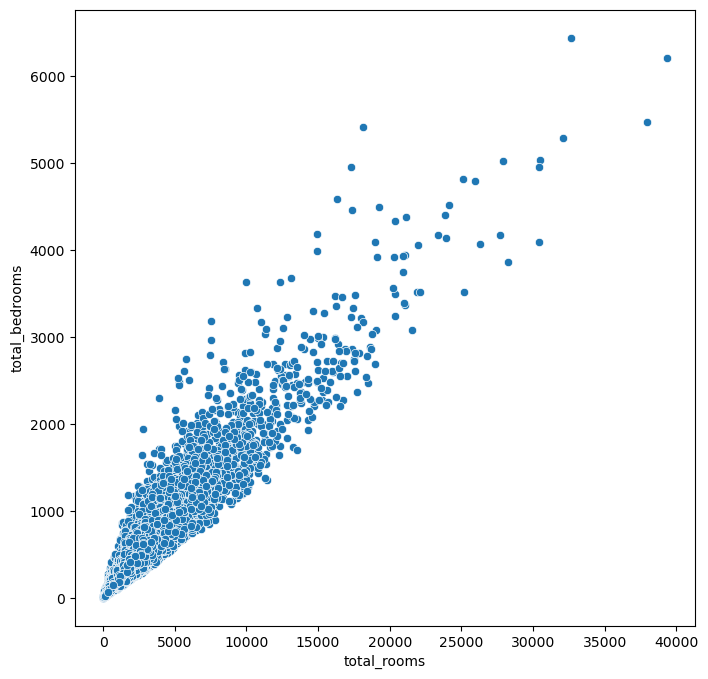

In [136]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='total_rooms', y='total_bedrooms')  
plt.title(f'')
plt.show()

In [137]:
df[['total_rooms','total_bedrooms']].corr()

,total_rooms,total_bedrooms
total_rooms,1.00000,0.93038
total_bedrooms,0.93038,1.00000


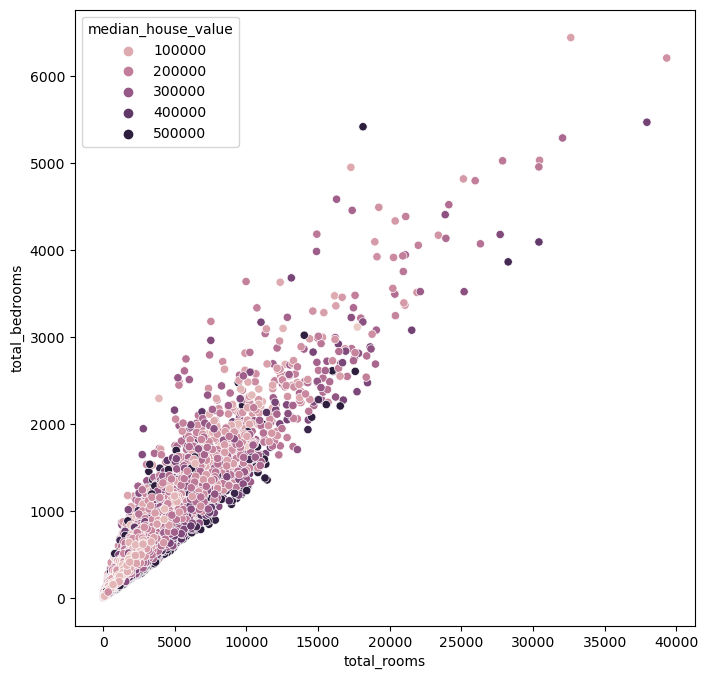

In [138]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='total_rooms', y='total_bedrooms', hue='median_house_value',legend="auto")  
plt.title(f'')
plt.show()

In [139]:
df_corr = df.copy()

In [140]:
df_corr.drop(columns={'ocean_proximity'}, inplace=True)

In [141]:
df_corr.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


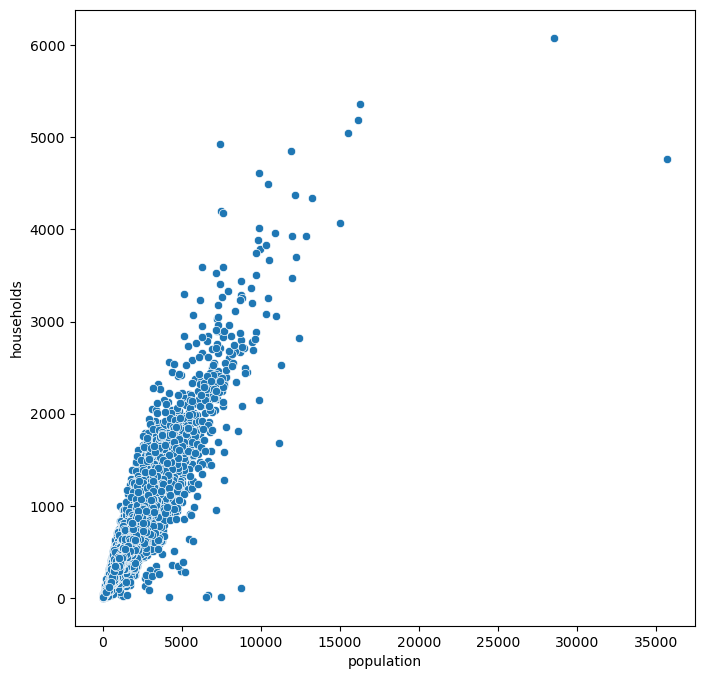

In [142]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='population', y='households')  
plt.title(f'')
plt.show()

In [143]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [144]:
df['median_income_fix'] = df['median_income'] * 10000

In [145]:
df[(df['median_house_value'] == 500001.0) &
   (df['median_income_fix'] == 150001.0)].sort_values(by='median_income_fix',ascending=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_fix
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,<1H OCEAN,150001.0
8850,-118.41,34.09,37.0,2716.0,302.0,809.0,291.0,15.0001,500001.0,<1H OCEAN,150001.0
8851,-118.42,34.09,40.0,3552.0,392.0,1024.0,370.0,15.0001,500001.0,<1H OCEAN,150001.0
8852,-118.42,34.08,48.0,2413.0,261.0,770.0,248.0,15.0001,500001.0,<1H OCEAN,150001.0
8853,-118.41,34.07,52.0,3562.0,394.0,1163.0,361.0,15.0001,500001.0,<1H OCEAN,150001.0
8854,-118.41,34.07,52.0,1202.0,142.0,408.0,138.0,15.0001,500001.0,<1H OCEAN,150001.0
8878,-118.50,34.04,52.0,3000.0,374.0,1143.0,375.0,15.0001,500001.0,<1H OCEAN,150001.0
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN,150001.0
10760,-117.87,33.62,15.0,2209.0,275.0,735.0,274.0,15.0001,500001.0,<1H OCEAN,150001.0
11520,-118.06,33.72,14.0,2665.0,331.0,964.0,319.0,15.0001,500001.0,NEAR OCEAN,150001.0


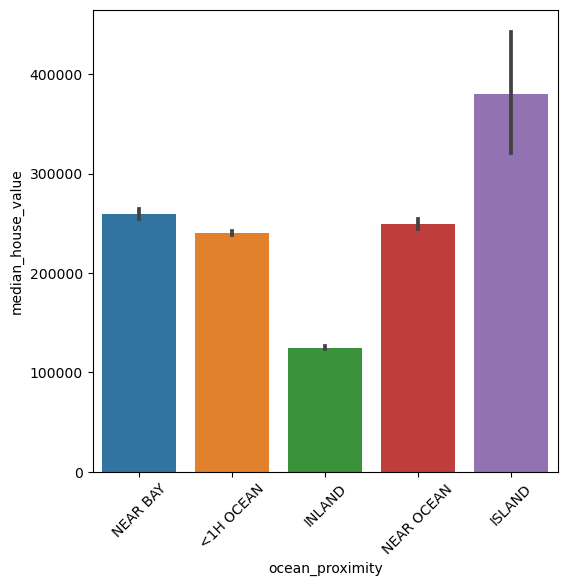

In [146]:
fig = plt.figure(figsize=(6,6))
sns.barplot(data=df,
                x='ocean_proximity', y='median_house_value',
                estimator=np.mean)
plt.title("")
plt.xticks(rotation=45)
plt.show()

### Conclusiones 

- Variable median_income es la mas correlacionada con la variable a predecir. 
- Room y bebrooms estan muy correlacionadas, al igual que populations y households.
- ocean_proximity parece ser una variable importante a la hora de predecir el precio mediano de una casa. 
- Populations es una variable que posee outliers, evaluar si conviene eliminarlos. 

In [149]:
df[df['housing_median_age'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_fix
3130,-117.95,35.08,1.0,83.0,15.0,32.0,15.0,4.8750,141700.0,INLAND,48750.0
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND,16250.0
18972,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0,INLAND,52636.0
19536,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0,INLAND,42500.0


## Seleccion de variables

In [151]:
colums = ['latitude', 'housing_median_age', 'total_rooms','population',
       'median_house_value', 'ocean_proximity', 'median_income_fix']

In [152]:
df = df[colums]

### Codificacion variable categorica

In [154]:
label_encoder = LabelEncoder()

In [155]:
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

df.head()

,latitude,housing_median_age,total_rooms,population,median_house_value,ocean_proximity,median_income_fix
0,37.88,41.0,880.0,322.0,452600.0,3,83252.0
1,37.86,21.0,7099.0,2401.0,358500.0,3,83014.0
2,37.85,52.0,1467.0,496.0,352100.0,3,72574.0
3,37.85,52.0,1274.0,558.0,341300.0,3,56431.0
4,37.85,52.0,1627.0,565.0,342200.0,3,38462.0


In [156]:
df.ocean_proximity.unique()

array([3, 0, 1, 4, 2])

In [157]:
label_encoder.inverse_transform([3,0])

array(['NEAR BAY', '<1H OCEAN'], dtype=object)

## Entrenamiento

Division entre train y test

In [160]:
scaler = StandardScaler()

In [161]:
x=df.drop(['median_house_value'],axis=1)
y=df[['median_house_value']]

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle=True)

In [163]:
x_train = scaler.fit_transform(X_train)

In [164]:
regr = LinearRegression()

In [165]:
regr.fit(x_train,Y_train)

LinearRegression()

In [166]:
y_train_predict = regr.predict(x_train)

In [168]:
mse = mean_squared_error(Y_train,y_train_predict)

In [169]:
mean_absolute_error(Y_train,y_train_predict)

58865.3685498913

In [170]:
rmse = np.sqrt(mse)

In [171]:
rmse

78522.94476733613

Evaluamos el modelo en test

In [172]:
x_test = scaler.transform(X_test)

In [173]:
y_test_predict = regr.predict(x_test)

In [174]:
mse = mean_squared_error(Y_test,y_test_predict)

In [175]:
mean_absolute_error(Y_test,y_test_predict)

59423.74672766247

In [176]:
rmse = np.sqrt(mse)

In [177]:
rmse

79835.65692167124

In [178]:
Y_test.describe()

,median_house_value
count,4128.000000
mean,205279.500969
std,114204.678512
min,14999.000000
25%,118800.000000
50%,177800.000000
75%,265600.000000
max,500001.000000


Recordamos que un modelo regresivo es "bueno" cuando el error no supera la desviacion estandar de la variable a predecir. Es decir, debemos evaluar la magnitud del error en la misma magnitud de la variable que estamos intentando explicar. 